In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_name = "australian_beer_production"

In [4]:
input_fname = "ausbeer.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Convert '.rda' file to '.csv'

In [5]:
# This will read the `ausbeer.rda` file and save its contents as a csv. 
!Rscript process.R

# Read Data

In [6]:
data = pd.read_csv(input_fname)
data.head()

,Date,Beer
0,1956.00,284
1,1956.25,213
2,1956.50,227
3,1956.75,308
4,1957.00,262


# Process Data

In [7]:
# Function to convert quarter to month and day
def quarter_to_date(qtr):
    year, quarter = str(qtr).split('.')
    year = int(year)
    if quarter == '0':
        return pd.Timestamp(year=year, month=1, day=1)
    elif quarter == '25':
        return pd.Timestamp(year=year, month=4, day=1)
    elif quarter == '5':
        return pd.Timestamp(year=year, month=7, day=1)
    elif quarter == '75':
        return pd.Timestamp(year=year, month=10, day=1)

# Apply the conversion to the 'Date' column
data['Date'] = data['Date'].apply(quarter_to_date)
data.head(5)

,Date,Beer
0,1956-01-01,284
1,1956-04-01,213
2,1956-07-01,227
3,1956-10-01,308
4,1957-01-01,262


In [8]:
# Insert Series Column 
data.insert(0, 'Series', 'AusBeer')

# Update 'Date' column to 'Quarter'
data.rename(columns={'Date': 'Quarter'}, inplace=True)
data.head(5)

,Series,Quarter,Beer
0,AusBeer,1956-01-01,284
1,AusBeer,1956-04-01,213
2,AusBeer,1956-07-01,227
3,AusBeer,1956-10-01,308
4,AusBeer,1957-01-01,262


In [9]:
series_col = "Series"
epoch_col = 'Quarter'
time_col = 'Quarter'
value_col = 'Beer'
exog_cols=[]

# Visualize

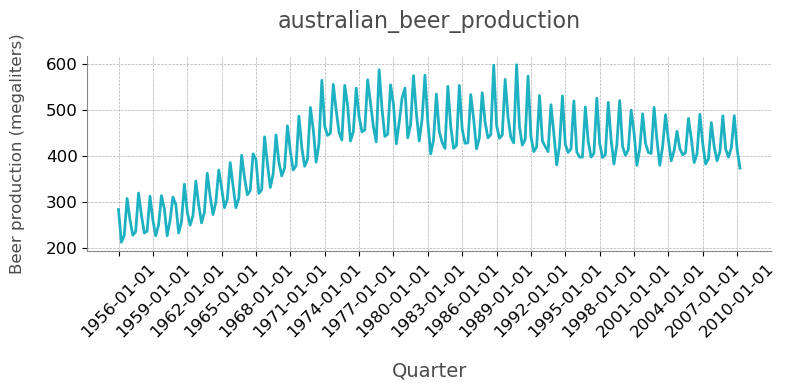

In [10]:
# Adjusting the spacing between axis titles and tick labels
plt.figure(figsize=(8, 4))

# Set title and labels with a medium contrast
font = {
#     'family': 'serif',
    'color':  '#4B4B4B',
    'weight': 'normal'
}

# Plotting the data
plt.plot(data[epoch_col], data[value_col], color='#1db1c1', linewidth=2)

# Adjusting the title and labels with increased spacing
plt.xlabel(epoch_col, fontsize=14, fontdict=font, labelpad=15)
plt.ylabel('Beer production (megaliters)', fontsize=12, fontdict=font, labelpad=15)
plt.title(dataset_name, fontsize=16, fontdict=font, pad=20)

# Adjusting x and y ticks
plt.xticks(data[epoch_col][::12], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and spines adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#B0B0B0')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

plt.tight_layout()
plt.savefig(outp_fig_fname)
plt.show()

# Save Data

In [11]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
    
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False)

In [12]:
data.shape

(218, 3)

In [13]:
data.tail()

,Series,Quarter,Beer
213,AusBeer,2009-04-01,398
214,AusBeer,2009-07-01,419
215,AusBeer,2009-10-01,488
216,AusBeer,2010-01-01,414
217,AusBeer,2010-04-01,374
